In [3]:
import pandas as pd

train_org = pd.read_csv('../data/train.csv')
train = train_org.copy()

/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train[train['league_name'] == 'Primera Division']['league_id'].unique()


array([ 752,  708,  764,  702,  687,  800,  770, 1616,  663])

In [5]:
import re

print('not historical value: ')
current_match_columns = [column for column in train.columns.values if 'history' not in column]
print(current_match_columns)
print('first historical value: ')
used = set()
columns_only_first_hist = [column for column in train.columns.values if
                           re.sub('\d', '', column) not in used and (used.add(re.sub('\d', '', column)) or True)]
print(columns_only_first_hist[len(current_match_columns):])


not historical value: 
['id', 'target', 'home_team_name', 'away_team_name', 'match_date', 'league_name', 'league_id', 'is_cup', 'home_team_coach_id', 'away_team_coach_id']
first historical value: 
['home_team_history_match_date_1', 'home_team_history_is_play_home_1', 'home_team_history_is_cup_1', 'home_team_history_goal_1', 'home_team_history_opponent_goal_1', 'home_team_history_rating_1', 'home_team_history_opponent_rating_1', 'home_team_history_coach_1', 'home_team_history_league_id_1', 'away_team_history_match_date_1', 'away_team_history_is_play_home_1', 'away_team_history_is_cup_1', 'away_team_history_goal_1', 'away_team_history_opponent_goal_1', 'away_team_history_rating_1', 'away_team_history_opponent_rating_1', 'away_team_history_coach_1', 'away_team_history_league_id_1']


Data type

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [7]:
date_columns = [column for column in train.columns.values if 'date' in column]
train[date_columns] = train[date_columns].astype('datetime64')
train.select_dtypes(include=[object]).columns
train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora Fútbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,7708122.0,37564088.0,...,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,São Bernardo,Água Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


In [8]:
train['is_cup'] = train['is_cup'].astype('int', errors='ignore').fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: datetime64[ns](21), float64(162), int64(2), object(5)
memory usage: 160.8+ MB


# Completely missing data

In [9]:
def check_prosense_nan_values(data, data_org):
    print('percent of object with nan value: ',
          f'{(data_org.shape[0] - data.dropna().shape[0]) / data_org.shape[0] * 100.:0.2f}')


check_prosense_nan_values(train, train_org)

percent of object with nan value:  42.20


Descriptive columns

In [10]:
pd.DataFrame(train[current_match_columns].isna().sum() / train.shape[0], columns=['Presence of nan value'])

,Presence of nan value
id,0.000000
target,0.000000
home_team_name,0.000009
away_team_name,0.000009
match_date,0.000000
league_name,0.000009
league_id,0.000000
is_cup,0.000000
home_team_coach_id,0.195794
away_team_coach_id,0.196641


Remove all coach id columns because a lot of nan value

In [11]:
columns_without_coach_col = [column for column in train.columns if 'coach' not in column]
train = train[columns_without_coach_col]
check_prosense_nan_values(train, train_org)


percent of object with nan value:  18.64


In [12]:
prosense_nan_value = pd.DataFrame(train.isna().sum() / train.shape[0], columns=['Presence of nan value'])
prosense_nan_value[prosense_nan_value['Presence of nan value'] > 0].sort_values(by='Presence of nan value',
                                                                                ascending=False)

,Presence of nan value
away_team_history_is_cup_10,0.133579
away_team_history_opponent_rating_10,0.128207
away_team_history_rating_10,0.128207
away_team_history_league_id_10,0.128144
away_team_history_opponent_goal_10,0.128144
...,...
home_team_history_is_play_home_1,0.010447
home_team_history_goal_1,0.010447
away_team_name,0.000009
league_name,0.000009


Text(0.5, 1.0, 'Nan values in rows')

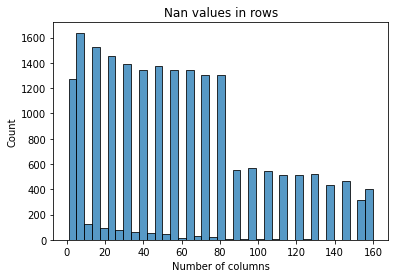

In [13]:
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.histplot(x=train.isnull().sum(axis=1)[train.isnull().sum(axis=1) > 0])
ax.set_xlabel('Number of columns')
ax.set_title('Nan values in rows')

# procentowa


Remove object with more than 80 nan value

In [14]:
train = train[train.isnull().sum(axis=1) < 80]
check_prosense_nan_values(train, train_org)

percent of object with nan value:  18.64


Change nan values to 0 if column name  contain "is"

In [15]:
is_columns = [column for column in train.columns.values if "is_" in column]
train[is_columns] = train[is_columns].fillna(0)
check_prosense_nan_values(train, train_org)

percent of object with nan value:  17.54


In [16]:
home_columns = [column for column in train.columns.values if 'is_cup' in column]
columns_without_9_10_day = [x for x in train.columns.values if '9' not in x and '10' not in x]
print('remove 9 and 10 day historii')
check_prosense_nan_values(train[columns_without_9_10_day], train_org)
train = train[columns_without_9_10_day]
train = train.dropna()
print('remove all nan data')
train.shape[0] / train_org.shape[0]

remove 9 and 10 day historii
percent of object with nan value:  14.23
remove all nan data


0.85774035948007

# Convert historical date to date difference

In [17]:
home_date_columns = [column for column in train.columns.values if
                     ('date' in column and 'home' in column) or column == 'match_date']
away_date_columns = [column for column in train.columns.values if
                     ('date' in column and 'away' in column) or column == 'match_date']
# train[date_columns]
train[home_date_columns[1:]] = train[home_date_columns].diff(periods=1, axis=1).apply(
    lambda x: x / np.timedelta64(-1, 'h')).iloc[:, 1:].astype('int64')
train[away_date_columns[1:]] = train[away_date_columns].diff(periods=1, axis=1).apply(
    lambda x: x / np.timedelta64(-1, 'h')).iloc[:, 1:].astype('int64')
train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,120,365,...,4.570225,2.843268,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,76,92,...,6.871904,5.716200,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,71,167,...,4.650054,5.284983,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,72,117,...,7.483589,5.587387,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,79,89,...,8.935007,5.888077,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora Fútbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,168,120,...,5.875017,6.233200,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,167,340,...,4.510164,3.885800,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,São Bernardo,Água Santa,2021-04-30 23:00:00,Paulista A2,1314,False,48,94,...,3.257969,4.472350,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,168,125,...,6.378186,6.726760,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


Delete match day because

In [18]:
train.describe()

,id,league_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,...,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8
count,9.515600e+04,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,...,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000
mean,1.515496e+07,838.170268,351.441013,355.957039,351.835607,357.048867,356.571567,360.081330,359.634642,363.517865,...,6.379412,6.386880,837.988587,837.834871,837.310154,837.026704,835.045357,834.741855,833.342490,831.342679
std,2.547274e+06,521.870267,860.531420,871.616890,860.368919,881.024596,878.996264,900.168462,890.323121,910.991340,...,2.479966,2.458589,522.097538,521.693938,521.192476,520.863854,520.256826,519.480234,519.428228,518.543528
min,1.142829e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255600,0.471950,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.199832e+07,387.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,4.773160,4.789793,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
50%,1.674685e+07,818.000000,162.000000,163.000000,164.000000,165.000000,165.000000,165.000000,166.000000,166.000000,...,5.848721,5.863131,818.000000,818.000000,818.000000,818.000000,812.000000,812.000000,809.000000,806.000000
75%,1.724099e+07,1258.000000,192.000000,192.000000,193.000000,193.000000,193.000000,194.000000,194.000000,195.000000,...,7.345342,7.354501,1258.000000,1258.000000,1260.000000,1260.000000,1258.000000,1258.000000,1258.000000,1257.000000
max,1.805384e+07,2037.000000,17058.000000,13585.000000,17058.000000,15622.000000,17058.000000,16891.000000,15622.000000,16891.000000,...,47.317600,47.317600,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000


# Visualization

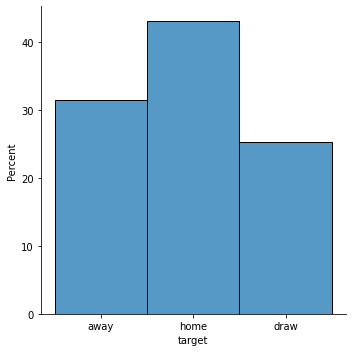

In [24]:
# ax =sns.histplot(train[['is_cup','target']],stat='percent',hue="is_cup")
# ax =sns.displot(train[['is_cup','target']],hue="is_cup")

ax.set_title("Win matches")
# sns.displot(train, x="target", col="is_cup", multiple="stack", stat='percent')
sns.displot(train, x="target", multiple="stack", stat='percent')

# ax1 =sns.histplot(train[train['is_cup'] == 0]['target'],stat='percent')


In [20]:
home_teams = train['home_team_name'].unique()
away_teams = train['away_team_name'].unique()
print('home teams', len(home_teams))
print('away teams', len(away_teams))
teams = np.unique(np.append(home_teams, away_teams))
print('all teams', len(teams))
# sns.histplot( np.append(train['home_team_name'].values,train['away_team_name'].values))



home teams 7830
away teams 7913
all teams 8187


the mo
             team  amount_match
249    Al Ittihad           160
5966  River Plate           148
4216    Liverpool           128
5808      Rangers           126
5150      Olimpia           121


/home/andrzej/PycharmProjects/Physionet_Challenge_2021/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

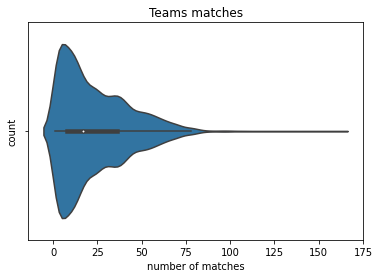

In [21]:
unique, counts = np.unique(np.append(train['home_team_name'].values, train['away_team_name'].values),
                           return_counts=True)
teams_amount_matches = pd.DataFrame({'team': unique, 'amount_match': counts}).sort_values(by=['amount_match'],
                                                                                          ascending=False)
print('the mo')
print(teams_amount_matches.head())
ax = sns.violinplot(counts)
ax.set_title('Teams matches')
ax.set_xlabel('number of matches')
ax.set_ylabel('count')

In [22]:
league_name_id = train.groupby(by=['league_name', 'league_id']).count().reset_index().iloc[:, :3].rename(
    columns={'id': 'count'}).sort_values('count', ascending=False)

# league_name_id = train.groupby(by=['league_name', 'league_id']).count()##
print('number of league_id', train['league_id'].unique().shape[0])
train[train['league_id'] == 8][['home_team_name', 'away_team_name']]

number of league_id 770


,home_team_name,away_team_name
416,Norwich City,Arsenal
418,Wolverhampton Wanderers,Sheffield United
574,Leicester City,Everton
576,Manchester United,Aston Villa
865,Crystal Palace,AFC Bournemouth
...,...,...
109393,Wolverhampton Wanderers,Burnley
109536,Leeds United,Manchester United
109780,Aston Villa,West Bromwich Albion
109989,Leicester City,Crystal Palace


In [23]:
columns_only_first_hist = [x for x in columns_only_first_hist if x in train.columns]
train[columns_only_first_hist].describe()


,id,league_id,home_team_history_match_date_1,home_team_history_is_play_home_1,home_team_history_is_cup_1,home_team_history_goal_1,home_team_history_opponent_goal_1,home_team_history_rating_1,home_team_history_opponent_rating_1,home_team_history_league_id_1,away_team_history_match_date_1,away_team_history_is_play_home_1,away_team_history_is_cup_1,away_team_history_goal_1,away_team_history_opponent_goal_1,away_team_history_rating_1,away_team_history_opponent_rating_1,away_team_history_league_id_1
count,9.515600e+04,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000,95156.000000
mean,1.515496e+07,838.170268,351.441013,0.297732,0.080468,1.333379,1.399775,6.253468,6.610639,839.276598,364.485687,0.705337,0.079858,1.429358,1.291185,6.738562,6.121288,837.988587
std,2.547274e+06,521.870267,860.531420,0.457264,0.272018,1.305523,1.316616,2.573044,2.475036,522.084376,892.198079,0.455894,0.271075,1.336497,1.259824,2.609597,2.436658,522.097538
min,1.142829e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217600,0.407900,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255600,0.217600,2.000000
25%,1.199832e+07,387.000000,96.000000,0.000000,0.000000,0.000000,0.000000,4.598900,4.994546,387.000000,96.000000,0.000000,0.000000,0.000000,0.000000,5.044703,4.552503,387.000000
50%,1.674685e+07,818.000000,162.000000,0.000000,0.000000,1.000000,1.000000,5.648300,6.092490,821.000000,162.000000,1.000000,0.000000,1.000000,1.000000,6.164850,5.565040,818.000000
75%,1.724099e+07,1258.000000,192.000000,1.000000,0.000000,2.000000,2.000000,7.200019,7.611882,1258.000000,193.000000,1.000000,0.000000,2.000000,2.000000,7.740186,7.036304,1258.000000
max,1.805384e+07,2037.000000,17058.000000,1.000000,1.000000,18.000000,18.000000,57.861050,45.849650,2037.000000,15478.000000,1.000000,1.000000,17.000000,13.000000,41.833644,41.833644,2039.000000
